<header align="center">
  <h1>* T-MAJ *</h1>
  <h1>~ Voltron ~</h1>
  <p>
    <i>Alexandre.D | Alexandre.P | Bastien.F</i>
  </p>
  <img src="https://images.unsplash.com/photo-1499346030926-9a72daac6c63?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" alt="air img"/>
  <h2>Daily climate time series analysis</h2>
</header>

# Setup

## Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.ensemble import IsolationForest

## Constants

In [40]:
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1
EPOCHS = 100
BATCH_SIZE = 128
SEED = 5

## Load data

In [36]:
# Parse dates and set date column to index
train_df = pd.read_csv("./data/DailyDelhiClimateTrain.csv",
                       parse_dates=["date"],
                       index_col=["date"])
test_df = pd.read_csv("./data/DailyDelhiClimateTest.csv",
                      parse_dates=["date"],
                      index_col=["date"])
print(f"Initial train size: {train_df.shape[0]}")
print(f"Initial test size: {test_df.shape[0]}")
print(f"Initial ratio: {(test_df.shape[0] / train_df.shape[0]):.2f}")

Initial train size: 1462
Initial test size: 114
Initial ratio: 0.08


In [37]:
df = pd.concat([train_df, test_df])
train_df = df.iloc[:int((1 - TEST_SIZE) * df.shape[0])]
test_df = df.iloc[int((1 - TEST_SIZE) * df.shape[0]):]
print(f"Updated train size: {train_df.shape[0]}")
print(f"Updated test size: {test_df.shape[0]}")
print(f"Updated ratio: {(test_df.shape[0] / train_df.shape[0]):.2f}")

Updated train size: 1418
Updated test size: 158
Updated ratio: 0.11


# EDA

## Plot values

Text(0.5, 1.0, 'pressure')

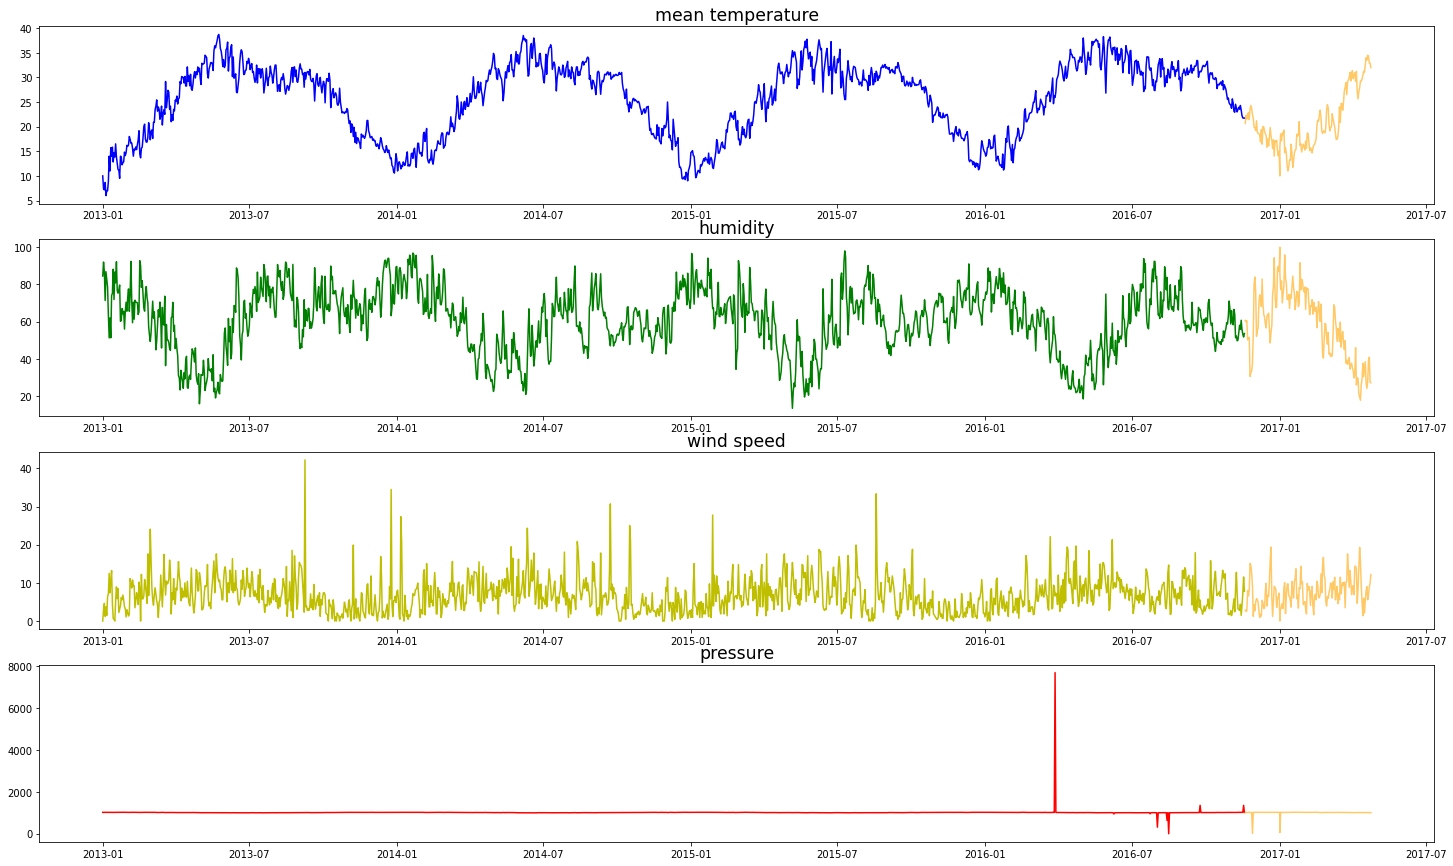

In [38]:
fig, axs = plt.subplots(4,1, figsize = (25,15))

axs[0].plot(train_df['meantemp'], color = 'b')
axs[0].plot(test_df['meantemp'], color = 'orange', alpha = 0.6)
axs[0].set_title('mean temperature', fontsize = 'xx-large')

axs[1].plot(train_df['humidity'], color = 'g')
axs[1].plot(test_df['humidity'], color = 'orange', alpha = 0.6)
axs[1].set_title('humidity', fontsize = 'xx-large')

axs[2].plot(train_df['wind_speed'], color = 'y')
axs[2].plot(test_df['wind_speed'], color = 'orange', alpha = 0.6)
axs[2].set_title('wind speed', fontsize = 'xx-large')

axs[3].plot(train_df['meanpressure'], color = 'r')
axs[3].plot(test_df['meanpressure'], color = 'orange', alpha = 0.6)
axs[3].set_title('pressure', fontsize = 'xx-large')

## Remove outliers

In [63]:
clf = IsolationForest(contamination=5e-3, random_state=SEED)
clf.fit(train_df['meanpressure'].to_numpy().reshape(-1,1))
outliers = clf.predict(train_df['meanpressure'].to_numpy().reshape(-1,1)) == -1

In [64]:
train_df['meanpressure'][outliers]

date
2016-03-28    7679.333333
2016-06-09     938.066667
2016-07-24     946.312500
2016-08-02     310.437500
2016-08-14     633.900000
2016-08-16      -3.041667
2016-09-24    1352.615385
2016-11-17    1350.296296
Name: meanpressure, dtype: float64

In [68]:
train_df.replace(to_replace=train_df['meanpressure'][outliers], value=train_df['meanpressure'].mean(), inplace=True)